In [1]:
import jif
import numpy as np
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

## Initialize roaster from YAML file

In [2]:
rstr = jif.Roaster("roaster.yaml")

In [3]:
pprint.pprint(rstr.config)

{'data': {'data_format': 'jif_segment',
          'epoch_num': -1,
          'filters': 'r',
          'segment_number': 0,
          'telescope': 'LSST'},
 'infiles': {'infile_1': 'output/roaster_model_image.h5'},
 'init': {'init_param_file': 'roaster_params.cfg', 'seed': 9216526},
 'metadata': {'outfile': '../output/TestData/roaster_out'},
 'model': {'achromatic': True,
           'galaxy_model_type': 'Spergel',
           'model_params': 'nu',
           'num_sources': 1},
 'run': {'debug': False, 'output_model': True, 'quiet': True},
 'sampling': {'nburn': 200,
              'nsamples': 500,
              'nthreads': 1,
              'nwalkers': 32,
              'sampler': 'emcee'}}


## Make the fake image data

In [4]:
images = rstr.render_model_images(nimages=1, nx=[64], ny=[64],
                                  tel_names=['LSST'], psfs=['model'], noise_var=1.e2)

2017-03-22 17:47:39,584 - DEBUG - Setting redshift to 1.000000
2017-03-22 17:47:39,585 - DEBUG - Setting nu to 0.500000
2017-03-22 17:47:39,587 - DEBUG - Setting hlr to 1.000000
2017-03-22 17:47:39,589 - DEBUG - Setting e1 to 0.000000
2017-03-22 17:47:39,591 - DEBUG - Setting e2 to 0.000000
2017-03-22 17:47:39,592 - DEBUG - Setting mag_sed1 to 27.500000
2017-03-22 17:47:39,593 - DEBUG - Setting mag_sed2 to 99.000000
2017-03-22 17:47:39,594 - DEBUG - Setting mag_sed3 to 99.000000
2017-03-22 17:47:39,596 - DEBUG - Setting mag_sed4 to 99.000000
2017-03-22 17:47:39,597 - DEBUG - Setting dx to 0.000000
2017-03-22 17:47:39,599 - DEBUG - Setting dy to 0.000000


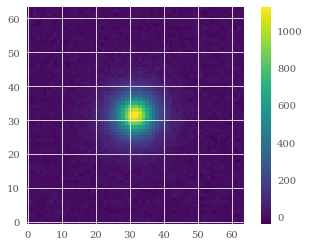

In [5]:
plt.imshow(images[0].array, interpolation='none', origin='lower')
plt.colorbar()

## Evaluate the image likelihood

In [6]:
rstr.model_paramnames

['nu']

In [7]:
nu = np.linspace(0.2, 0.8, 160)

lnp = np.array([rstr([nu_i]) for nu_i in nu])

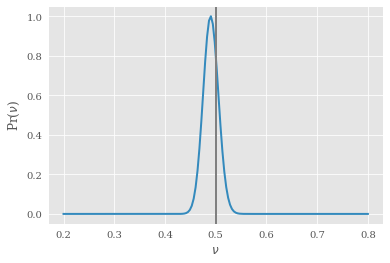

In [8]:
plt.plot(nu, np.exp(lnp - np.max(lnp)), color="#348ABD", alpha=1)
plt.axvline(0.5, color='grey')
plt.xlabel(r"$\nu$")
plt.ylabel(r"Pr($\nu$)")